In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/home/jaggu/viz/final_project/backend/datasets/Constellation_Stars.csv')

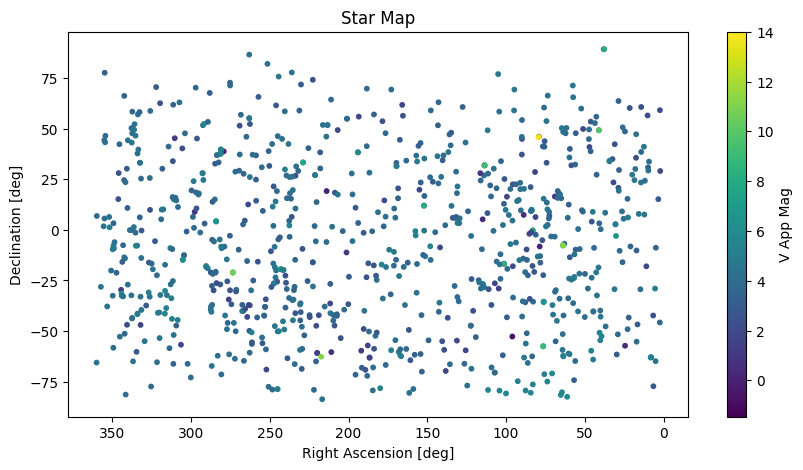

In [2]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.scatter(df['RA [deg]'], df['Dec [deg]'], s=10, c=df['V App Mag'])
plt.gca().invert_xaxis()  # RA increases from right to left
plt.colorbar(label='V App Mag')
plt.xlabel('Right Ascension [deg]')
plt.ylabel('Declination [deg]')
plt.title('Star Map')
plt.show()

In [3]:
con_lines = pd.read_csv('/home/jaggu/viz/final_project/backend/datasets/constellationship.fab', header=None)
con_lines['constellation'] = con_lines[0].str.split().str.get(0)
con_lines['constellation'] = con_lines['constellation'].str.upper()
con_lines['num_pairs'] = con_lines[0].str.split().str.get(1)
con_lines['stars'] = con_lines[0].str.split().str[2:]
con_lines.drop(0, axis=1, inplace=True)

In [4]:
con_lines

,constellation,num_pairs,stars
0,AND,20,"[677, 3092, 3092, 5447, 5447, 9640, 113726, 11..."
1,ANT,2,"[53502, 51172, 51172, 46515]"
2,APS,3,"[72370, 81065, 80047, 81852, 81852, 81065]"
3,AQL,14,"[98036, 97649, 97649, 97278, 97278, 95501, 955..."
4,AQR,21,"[102618, 106278, 106278, 109074, 109074, 11039..."
...,...,...,...
83,UMI,7,"[11767, 85822, 85822, 82080, 82080, 77055, 770..."
84,VEL,8,"[42913, 39953, 39953, 44816, 44816, 46651, 466..."
85,VIR,20,"[60129, 58948, 58948, 57380, 57380, 57757, 577..."
86,VOL,6,"[44382, 41312, 41312, 39794, 39794, 35228, 352..."


In [5]:
stars = [float(y) for x in con_lines['stars'].tolist() for y in x]
stars = sorted(set(stars))

In [7]:
hgv_data = pd.read_csv('/home/jaggu/viz/final_project/backend/datasets/hygdata_v3.csv')
hgv_data['con'] = hgv_data['con'].str.upper()
want = hgv_data['mag'] <= 6.5
hgv_data = hgv_data[want]

In [8]:
ras, decs, = [], []
for star in stars: 
    temp = hgv_data[hgv_data['hip']==star]
    assert len(temp) == 1
    ras.append(temp['ra'].tolist()[0])
    decs.append(temp['dec'].tolist()[0])

star_df = pd.DataFrame(data={'star_ID':stars, 'ra':ras, 'dec':decs})
con_lines['ra'] = ''
con_lines['dec'] = ''

for index, row in con_lines.iterrows(): 
    ras, decs = [], []
    for star in row['stars']: 
        temp = hgv_data[hgv_data['hip']==float(star)]
        assert len(temp) == 1
        ras.append(temp['ra'].tolist()[0])
        decs.append(temp['dec'].tolist()[0])
    con_lines.at[index, 'ra'] = ras
    con_lines.at[index, 'dec'] = decs


In [9]:
with open('/home/jaggu/viz/final_project/backend/datasets/iau_neighbors.txt','r') as f:
    cst_neigh = f.readlines()
    cst_neigh = [line.replace(',','').split() for line in cst_neigh]

In [10]:
con_lines

,constellation,num_pairs,stars,ra,dec
0,AND,20,"[677, 3092, 3092, 5447, 5447, 9640, 113726, 11...","[0.139791, 0.655462, 0.655462, 1.162194, 1.162...","[29.090432, 30.861024, 30.861024, 35.620558, 3..."
1,ANT,2,"[53502, 51172, 51172, 46515]","[10.945289, 10.45253, 10.45253, 9.487423]","[-37.137765, -31.067779, -31.067779, -35.951335]"
2,APS,3,"[72370, 81065, 80047, 81852, 81852, 81065]","[14.797701, 16.557609, 16.339119, 16.718126, 1...","[-79.044751, -78.897148, -78.695745, -77.51743..."
3,AQL,14,"[98036, 97649, 97649, 97278, 97278, 95501, 955...","[19.921887, 19.846388, 19.846388, 19.770994, 1...","[6.406763, 8.868322, 8.868322, 10.613261, 10.6..."
4,AQR,21,"[102618, 106278, 106278, 109074, 109074, 11039...","[20.794598, 21.525982, 21.525982, 22.096399, 2...","[-9.495776, -5.571172, -5.571172, -0.319851, -..."
...,...,...,...,...,...
83,UMI,7,"[11767, 85822, 85822, 82080, 82080, 77055, 770...","[2.52975, 17.536918, 17.536918, 16.766159, 16....","[89.264109, 86.58646, 86.58646, 82.037262, 82...."
84,VEL,8,"[42913, 39953, 39953, 44816, 44816, 46651, 466...","[8.745059, 8.158876, 8.158876, 9.133268, 9.133...","[-54.708821, -47.336588, -47.336588, -43.43258..."
85,VIR,20,"[60129, 58948, 58948, 57380, 57380, 57757, 577...","[12.331766, 12.086817, 12.086817, 11.764322, 1...","[-0.666803, 8.732985, 8.732985, 6.529376, 6.52..."
86,VOL,6,"[44382, 41312, 41312, 39794, 39794, 35228, 352...","[9.040777, 8.428951, 8.428951, 8.132173, 8.132...","[-66.396076, -66.13689, -66.13689, -68.617062,..."
